<a href="https://colab.research.google.com/github/bibhutibhusans/CNN_VisualizationMethods/blob/master/keras_vis_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raghakot/keras-vis.git

Cloning into 'keras-vis'...
remote: Enumerating objects: 1565, done.
remote: Total 1565 (delta 0), reused 0 (delta 0), pack-reused 1565
Receiving objects: 100% (1565/1565), 149.92 MiB | 33.89 MiB/s, done.
Resolving deltas: 100% (833/833), done.


In [0]:
!mv keras-vis/ myvis

In [3]:
from keras.applications.vgg16 import VGG16
from kerasvis.vis.utils import utils
from keras import activations

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(224, 224, 3))

# Utility to search for layer index by name. 

# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


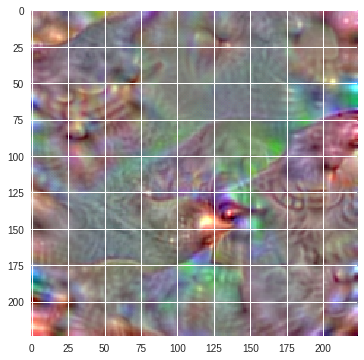

In [4]:
from myvis.vis.visualization import visualize_activation

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

# 20 is the imagenet category for 'ouzel'
img = visualize_activation(model, layer_idx, filter_indices=20)
plt.imshow(img)

In [0]:
# 20 is the imagenet category for 'ouzel'
img = visualize_activation(model, layer_idx, filter_indices=20, max_iter=500, verbose=True)
plt.imshow(img)

In [0]:
from myvis.vis.input_modifiers import Jitter

# 20 is the imagenet category for 'ouzel'
# Jitter 16 pixels along all dimensions to during the optimization process.
img = visualize_activation(model, layer_idx, filter_indices=20, max_iter=500, input_modifiers=[Jitter(16)])
plt.imshow(img)

In [0]:
import numpy as np
categories = np.random.permutation(1000)[:15]

vis_images = []
image_modifiers = [Jitter(16)]
for idx in categories:    
    img = visualize_activation(model, layer_idx, filter_indices=idx, max_iter=500, input_modifiers=image_modifiers)
    
    # Reverse lookup index to imagenet label and overlay it on the image.
    img = utils.draw_text(img, utils.get_imagenet_label(idx))
    vis_images.append(img)

# Generate stitched images with 5 cols (so it will have 3 rows).
plt.rcParams['figure.figsize'] = (50, 50)
stitched = utils.stitch_images(vis_images, cols=5)
plt.axis('off')
plt.imshow(stitched)
plt.show()

Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


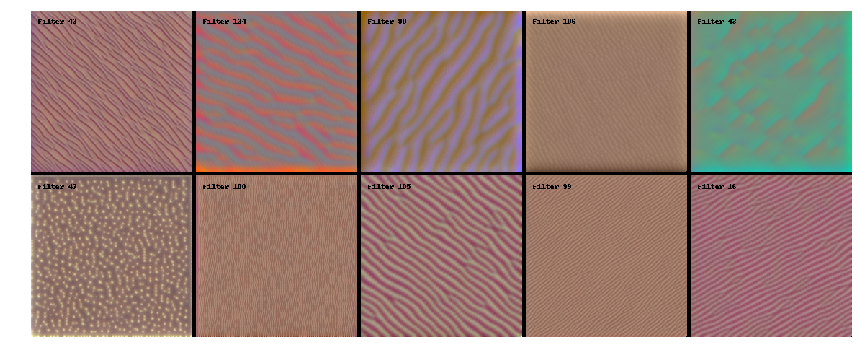

Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default
Failed to lookup font 'FreeSans.ttf', falling back to default


KeyboardInterrupt: ignored

In [7]:
import numpy as np
from myvis.vis.visualization import get_num_filters

selected_indices = []
for layer_name in ['block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']:
    layer_idx = utils.find_layer_idx(model, layer_name)

    # Visualize all filters in this layer.
    filters = np.random.permutation(get_num_filters(model.layers[layer_idx]))[:10]
    selected_indices.append(filters)

    # Generate input image for each filter.
    vis_images = []
    for idx in filters:
        img = visualize_activation(model, layer_idx, filter_indices=idx)

        # Utility to overlay text on image.
        img = utils.draw_text(img, 'Filter {}'.format(idx))    
        vis_images.append(img)

    # Generate stitched image palette with 5 cols so we get 2 rows.
    stitched = utils.stitch_images(vis_images, cols=5)    
    plt.figure()
    plt.axis('off')
    plt.imshow(stitched)
    plt.show()